# 大乐透历史数据处理_各个红球x期移动出击次数算法2022-03-08


In [1]:
# 导入模块
import pandas as pd
import numpy as np
import time
# 取当前日期和时间
date = (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
date

'2022-03-27 01:00:30'

In [2]:
# 导入排列组合计算函数
#调用scipy科学计算包中计算排列组合（permutation and combination）的模块
from scipy.special import perm, comb
#调用 itertools库（内置库） 获取排列组合的全部情况数
from itertools import permutations, combinations

In [3]:
# 举例
b = comb(9,6)  #组合
print(b)
c = comb(11,6)  #组合
print(c)
p = perm(35,3) #排列
print(p)
list(combinations(['a','b','c'],2))


84.0
462.0
39270.0


[('a', 'b'), ('a', 'c'), ('b', 'c')]

In [4]:
# 生成所有35个红球的列表数据赋值给a35
a35 = []
for i in range(1,36):
    a35.append(i)

In [5]:
path0 = '大乐透总历史开奖号码表.xlsx'
df = pd.read_excel(path0)
dfa = df.iloc[:,[0,2,3,4,5,6]]
print(dfa.head())
dfa.shape

      期号  H1  H2  H3  H4  H5
0  22032   5   9  18  31  32
1  22031   7  14  16  20  28
2  22030  12  14  15  21  30
3  22029   7   8  10  14  17
4  22028   4   9  16  17  35


(3983, 6)

In [6]:
# 按期号升序排序,DataFrame按指定列排序_升序
dfa1 = dfa.sort_values(by='期号')
# DataFrame重新建索引
dfb = dfa1.reset_index().drop('index', axis = 1)
# 排序后存盘excel文件
dfb.to_excel('大乐透历史数据红球数据_升序.xlsx', index=False)


In [7]:
df1 = pd.read_excel('大乐透历史数据红球数据_升序.xlsx')
df1['球号'] = 0
df1['出击'] = 0
df1['次数1'] = 0
df1['次数1均值'] = 0
df1['次数2'] = 0
df1['次数2均值'] = 0
df1['间隔'] = 0
df1['间隔均值'] = 0
path = '大乐透历史数据_各个红球x期出击次数基本数据表_升序.xlsx'
df1.to_excel(path, index=False)
df1.head()

,期号,H1,H2,H3,H4,H5,球号,出击,次数1,次数1均值,次数2,次数2均值,间隔,间隔均值
0,7001,22,24,29,31,35,0,0,0,0,0,0,0,0
1,7002,15,22,31,34,35,0,0,0,0,0,0,0,0
2,7003,3,4,18,23,32,0,0,0,0,0,0,0,0
3,7004,6,10,16,17,25,0,0,0,0,0,0,0,0
4,7005,1,9,19,20,30,0,0,0,0,0,0,0,0


In [8]:
# 读入大乐透历史数据红球均线数据_升序.xlsx为df1a
path = '大乐透历史数据_各个红球x期出击次数基本数据表_升序.xlsx'
df1a = pd.read_excel(path)
# 生成所有35个红球的列表数据赋值给a35
a35 = []
for i in range(1,36):
    a35.append(i)
# # 生成35取2的球号组合
# lx_2 = list(combinations(a35, 2))
# dlx_2 = pd.DataFrame(lx_2)

# 计算df1a对应的每x期的移动出击次数线数据
# 计算移动每个x期中各个红球出击次数
print("### 日期时间：", date)
x = 13

for ii in range(len(a35)):
# for ii in range(3): 
    df1a.球号 = a35[ii]
    df1a['出击'] = 0
    df1a['次数1'] = 0
    df1a['次数1均值'] = 0
    df1a['次数2'] = 0
    df1a['次数2均值'] = 0
    df1a['间隔'] = 0
    df1a['间隔均值'] = 0
    a = 0
    b = 0
    bb=0
    c = 0

    for m in range(df1a.shape[0]):        
        a = 0

        h1 = df1a.loc[m,'H1']
        h2 = df1a.loc[m,'H2']
        h3 = df1a.loc[m,'H3']
        h4 = df1a.loc[m,'H4']
        h5 = df1a.loc[m,'H5']
        if a35[ii]==h1 or a35[ii]==h2 or a35[ii]==h3 or a35[ii]==h4 or a35[ii]==h5:
            a=a+1

        b = b+1 #计算期数
        if b>x:
            b = 0
            bb = 0
        if a>=1: 
            df1a.loc[m,'出击'] = 1
            bb = bb + 1
            a = 0
            c = 0
            df1a.loc[m,'间隔'] = 0
        else:
            a = 0
            c = c+1
            df1a.loc[m,'间隔'] = c
            df1a.loc[m,'出击'] = 0

        df1a.loc[m,'次数1'] = bb
        if m<x-1:
            df1a.loc[m,'次数2'] = df1a.loc[:m,'出击'].sum()
            df1a.loc[m,'次数1均值'] = int(df1a.loc[:m,'次数1'].mean()*100)/100
            df1a.loc[m,'次数2均值'] = int(df1a.loc[:m,'次数2'].mean()*100)/100
            df1a.loc[m,'间隔均值'] = int(df1a.loc[:m,'间隔'].mean()*100)/100
        else:
            df1a.loc[m,'次数2'] = df1a.loc[m-x+1:m,'出击'].sum()
            df1a.loc[m,'次数1均值'] = int(df1a.loc[m-x+1:m,'次数1'].mean()*100)/100
            df1a.loc[m,'次数2均值'] = int(df1a.loc[m-x+1:m,'次数2'].mean()*100)/100            
            df1a.loc[m,'间隔均值'] = int(df1a.loc[m-x+1:m,'间隔'].mean()*100)/100

    path1 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个红球'+str(x)+'期出击次数算法\\'+str(a35[ii])+'号球移动'+str(x)+'期出击数据mean_次数1+次数2+间隔均值：'+str(int(df1a.次数1.mean()*100)/100)+'_'+str(int(df1a.次数2.mean()*100)/100)+'_'+str(int(df1a.间隔均值.mean()*100)/100)+'_'+str(date[:10])+'.xlsx'
    path1a = str(a35[ii])+'号球移动'+str(x)+'期出击数据mean_次数1+次数2+间隔均值：'+str(int(df1a.次数1.mean()*100)/100)+'_'+str(int(df1a.次数2.mean()*100)/100)+'_'+str(int(df1a.间隔均值.mean()*100)/100)
    print(path1a)
    df1a.to_excel(path1, index=False)

    if ii==0:
        df1b = df1a.copy()
    else:
        # 合并连接二个DataFrame        
        df1b = pd.concat([df1b, df1a])

path2 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个红球'+str(x)+'期出击次数算法\\'+str(date[:10])+'汇总各个红球'+'移动'+str(x)+'期出击次数数据.xlsx'
df1b.to_excel(path2, index=False)
df1b
print('END', '='*80, 'END')



### 日期时间： 2022-03-27 01:00:30
1号球移动13期出击数据mean_次数1+次数2+间隔均值：1.17_1.93_10.01
2号球移动13期出击数据mean_次数1+次数2+间隔均值：1.04_1.75_11.19
3号球移动13期出击数据mean_次数1+次数2+间隔均值：1.09_1.88_10.78
4号球移动13期出击数据mean_次数1+次数2+间隔均值：0.93_1.59_14.67
5号球移动13期出击数据mean_次数1+次数2+间隔均值：1.05_1.84_10.58
6号球移动13期出击数据mean_次数1+次数2+间隔均值：0.98_1.78_11.55
7号球移动13期出击数据mean_次数1+次数2+间隔均值：1.09_1.89_10.72
8号球移动13期出击数据mean_次数1+次数2+间隔均值：0.92_1.63_11.37
9号球移动13期出击数据mean_次数1+次数2+间隔均值：1.0_1.68_11.68
10号球移动13期出击数据mean_次数1+次数2+间隔均值：1.01_1.74_10.79
11号球移动13期出击数据mean_次数1+次数2+间隔均值：1.04_1.81_10.2
12号球移动13期出击数据mean_次数1+次数2+间隔均值：0.97_1.68_11.66
13号球移动13期出击数据mean_次数1+次数2+间隔均值：1.01_1.75_11.49
14号球移动13期出击数据mean_次数1+次数2+间隔均值：1.06_1.8_11.05
15号球移动13期出击数据mean_次数1+次数2+间隔均值：0.88_1.61_13.39
16号球移动13期出击数据mean_次数1+次数2+间隔均值：0.86_1.43_15.51
17号球移动13期出击数据mean_次数1+次数2+间隔均值：1.0_1.72_12.52
18号球移动13期出击数据mean_次数1+次数2+间隔均值：1.06_1.79_10.25
19号球移动13期出击数据mean_次数1+次数2+间隔均值：1.1_1.89_10.3
20号球移动13期出击数据mean_次数1+次数2+间隔均值：0.96_1.76_11.55
21号球移动13期出击数据mean_次数1+次数2+间隔均值：0.95_1.67_12.7

In [9]:
str(date[:10])

'2022-03-27'

In [10]:
df1b.shape

(139405, 14)

In [11]:
df1b.次数1.max()

12

In [12]:
df1b.次数2.max()

11

In [13]:
data = df1b.values
column = df1b.columns
column

Index(['期号', 'H1', 'H2', 'H3', 'H4', 'H5', '球号', '出击', '次数1', '次数1均值', '次数2',
       '次数2均值', '间隔', '间隔均值'],
      dtype='object')

In [14]:
df1d = pd.DataFrame(data, columns=column,index=[df1b['球号'], df1b['期号']], )
path3 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个红球'+str(x)+'期出击次数算法\\'+str(date[:10])+'大乐透各个红球13期移动数据_升序+二层索引.xlsx'
df1d.to_excel(path3, index=True)
df1d.shape


(139405, 14)

In [15]:
df1d.index.names

FrozenList(['球号', '期号'])

In [16]:
c91 = list(df1b[df1b.次数1>=df1b.次数1.max()].球号)
print('df1b.次数1.max()=', df1b.次数1.max())
c91a = []
c91a.append(c91[0])
for i in c91:
    if i in c91a:
        pass
    else:
        c91a.append(i)
print('c91a: ', len(c91a),c91a)

c9 = list(df1b[df1b.次数1>=df1b.次数1.max()-1].球号)
print('df1b.次数1.max()-1=', df1b.次数1.max()-1)
c9a = []
c9a.append(c9[0])
for i in c9:
    if i in c9a:
        pass
    else:
        c9a.append(i)
print('c9a: ', len(c9a),c9a)

c92 = list(df1b[df1b.次数1>=df1b.次数1.max()-2].球号)
print('df1b.次数1.max()-2=', df1b.次数1.max()-2)
c92a = []
c92a.append(c92[0])
for i in c92:
    if i in c92a:
        pass
    else:
        c92a.append(i)
print('c92a: ', len(c92a),c92a)


df1b.次数1.max()= 12
c91a:  1 [13]
df1b.次数1.max()-1= 11
c9a:  1 [13]
df1b.次数1.max()-2= 10
c92a:  9 [1, 8, 13, 18, 21, 28, 30, 33, 35]


In [17]:
# 大乐透_移动13期次数1(max-2)球号组合c92a
f = open('大乐透_移动13期次数1(max-2)球号组合.txt', 'w')
for i in c92a:
    f.write(str(i)+'\n')
f.close()


In [18]:
f = open('大乐透_移动13期次数1(max-2)球号组合.txt', 'r')
l1 = f.readlines()
print(l1)
zj = []
for i in l1:
    zj.append(int(i[:-1]))
zj


['1\n', '8\n', '13\n', '18\n', '21\n', '28\n', '30\n', '33\n', '35\n']


[1, 8, 13, 18, 21, 28, 30, 33, 35]

In [19]:
c91 = list(df1b[df1b.次数2>=df1b.次数2.max()].球号)
print('df1b.次数2.max()=', df1b.次数2.max())
c91a = []
c91a.append(c91[0])
for i in c91:
    if i in c91a:
        pass
    else:
        c91a.append(i)
print('c91a: ', len(c91a),c91a)

c9 = list(df1b[df1b.次数2>=df1b.次数2.max()-1].球号)
print('df1b.次数2.max()-1=', df1b.次数2.max()-1)
c9a = []
c9a.append(c9[0])
for i in c9:
    if i in c9a:
        pass
    else:
        c9a.append(i)
print('c9a: ', len(c9a),c9a)


df1b.次数2.max()= 11
c91a:  2 [13, 31]
df1b.次数2.max()-1= 10
c9a:  11 [1, 8, 13, 25, 28, 30, 31, 32, 33, 34, 35]


In [20]:
df1b.shape

(139405, 14)

# ======================================================================================

## 画图

In [21]:
# 导入需要的函数
from bokeh.plotting import figure, output_notebook, show
import seaborn as sns
from matplotlib import pyplot as plt


In [22]:
print('df1b.次数1.max()-2=', df1b.次数1.max()-2)
# print('df1b.次数1.mean=', df1b.次数1.mean())
print('c92a:', len(c92a),c92a)


df1b.次数1.max()-2= 10
c92a: 9 [1, 8, 13, 18, 21, 28, 30, 33, 35]


In [23]:
f = open('大乐透_移动13期次数1(max-2)球号组合.txt', 'r')
l1 = f.readlines()
print(l1)
zj = []
for i in l1:
    zj.append(int(i[:-1]))
zj

['1\n', '8\n', '13\n', '18\n', '21\n', '28\n', '30\n', '33\n', '35\n']


[1, 8, 13, 18, 21, 28, 30, 33, 35]

In [24]:
qs = -50

1号球每13期移动出击次数线


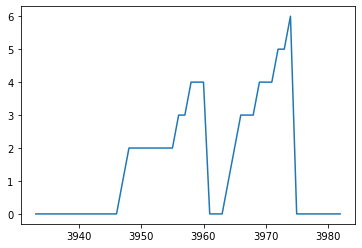

8号球每13期移动出击次数线


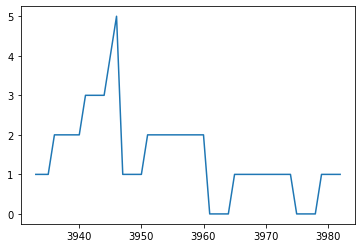

13号球每13期移动出击次数线


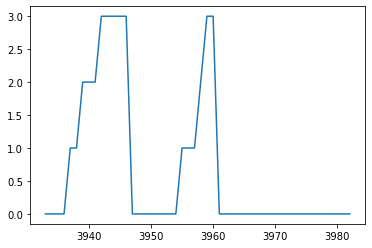

18号球每13期移动出击次数线


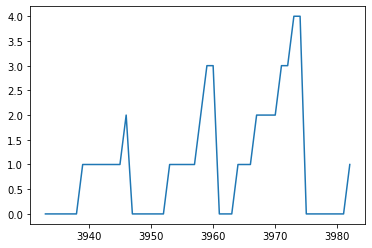

21号球每13期移动出击次数线


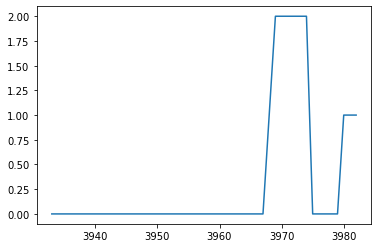

28号球每13期移动出击次数线


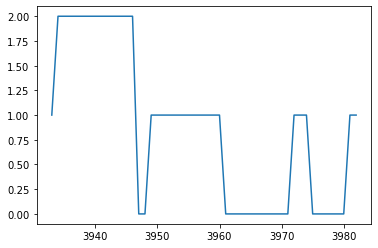

30号球每13期移动出击次数线


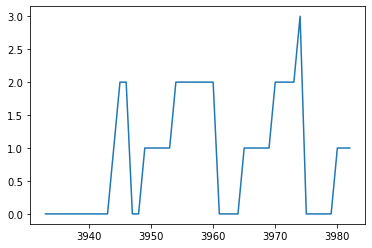

33号球每13期移动出击次数线


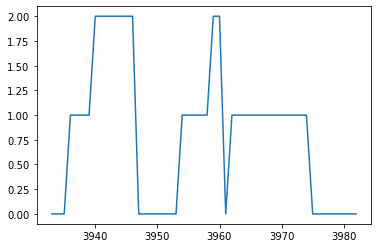

35号球每13期移动出击次数线


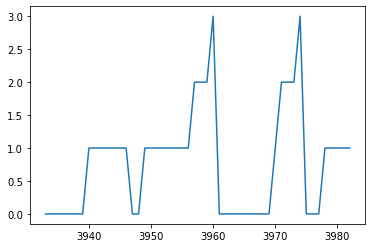

In [25]:
# 循环遍历c92a中各球画出每13期移动出击次数线
for i in range(len(c92a)):
    # 计算x/y的数据
    y1 = df1b[df1b.球号==c92a[i]].次数1[qs:]
    x1 = df1b[df1b.球号==c92a[i]].期号[qs:]
    # 创建画布 p，设置 x_axis_type='datetime'
    # plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(c92a[i])+'号球每13期移动出击次数线')
    plt.plot(x1.index, y1)
    plt.title=str(c92a[i])+'号球每13期移动出击次数线'
    plt.show()


1号球每13期移动出击次数均值线


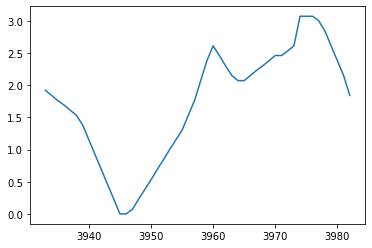

8号球每13期移动出击次数均值线


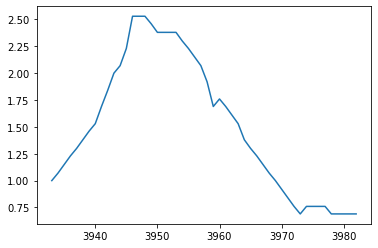

13号球每13期移动出击次数均值线


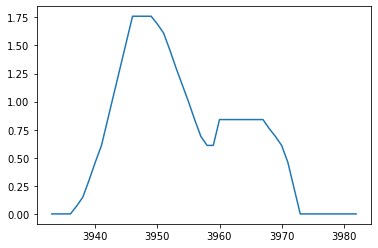

18号球每13期移动出击次数均值线


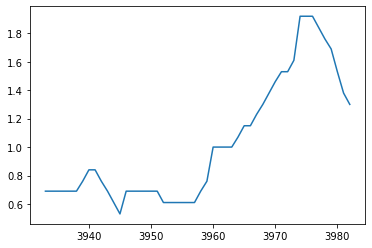

21号球每13期移动出击次数均值线


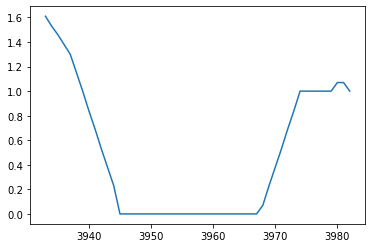

28号球每13期移动出击次数均值线


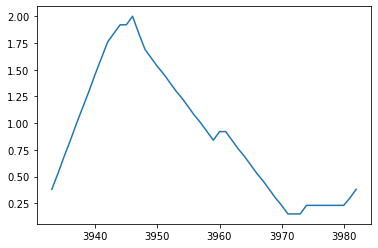

30号球每13期移动出击次数均值线


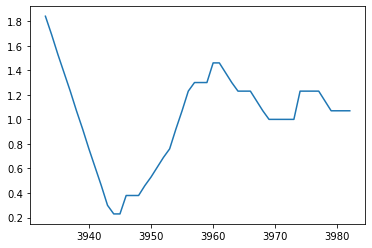

33号球每13期移动出击次数均值线


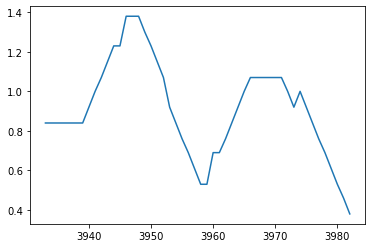

35号球每13期移动出击次数均值线


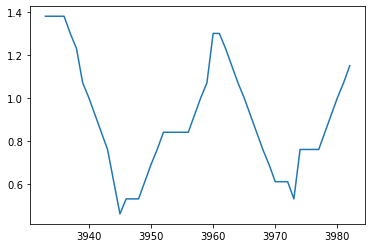

In [26]:
# 循环遍历c92a中各球画出每13期移动出击次数均值线
for i in range(len(c92a)):
    # 计算x/y的数据
    y1 = df1b[df1b.球号==c92a[i]].次数1均值[qs:]
    x1 = df1b[df1b.球号==c92a[i]].期号[qs:]
    # 创建画布 p，设置 x_axis_type='datetime'
    # plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(c92a[i])+'号球每13期移动出击次数均值线')
    plt.plot(x1.index, y1)
    plt.title=str(c92a[i])+'号球每13期移动出击次数均值线'
    plt.show()


1号球每13期移动出击间隔线


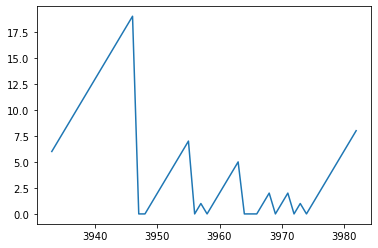

8号球每13期移动出击间隔线


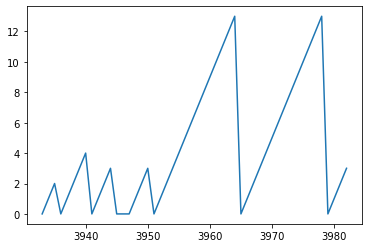

13号球每13期移动出击间隔线


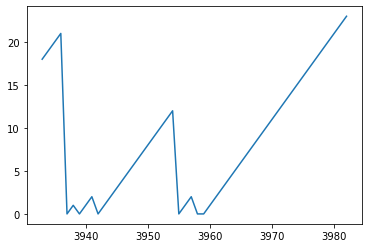

18号球每13期移动出击间隔线


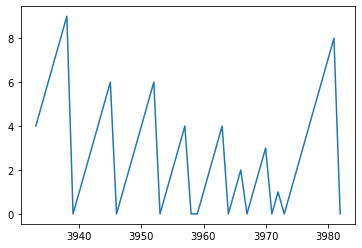

21号球每13期移动出击间隔线


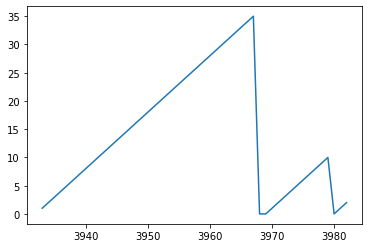

28号球每13期移动出击间隔线


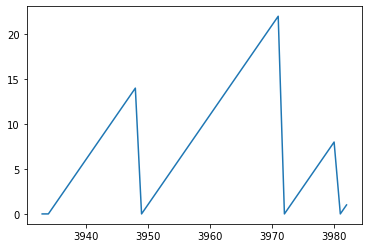

30号球每13期移动出击间隔线


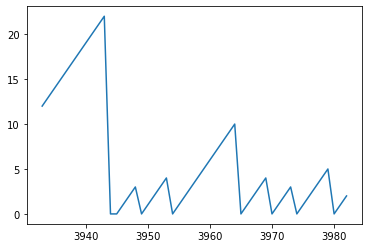

33号球每13期移动出击间隔线


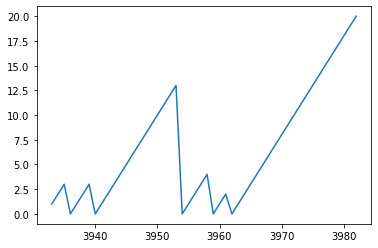

35号球每13期移动出击间隔线


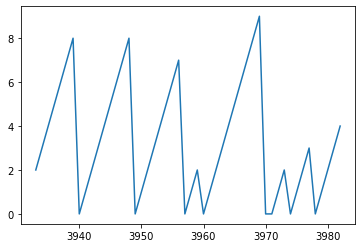

In [27]:
# 循环遍历c92a中各球画出每13期移动出击间隔线
for i in range(len(c92a)):
    # 计算x/y的数据
    y1 = df1b[df1b.球号==c92a[i]].间隔[qs:]
    x1 = df1b[df1b.球号==c92a[i]].期号[qs:]
    # 创建画布 p，设置 x_axis_type='datetime'
    # plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(c92a[i])+'号球每13期移动出击间隔线')
    plt.plot(x1.index, y1)
    plt.title=str(c92a[i])+'号球每13期移动出击间隔线'
    plt.show()
    

1号球每13期移动出击间隔均值线


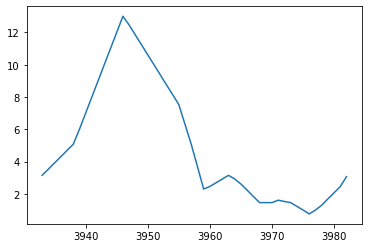

8号球每13期移动出击间隔均值线


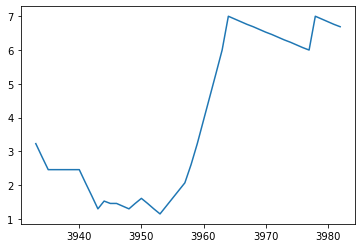

13号球每13期移动出击间隔均值线


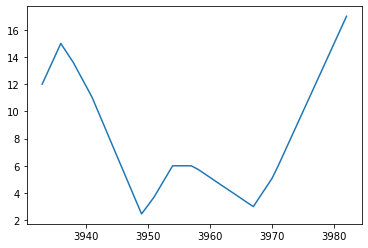

18号球每13期移动出击间隔均值线


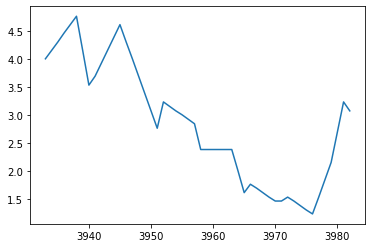

21号球每13期移动出击间隔均值线


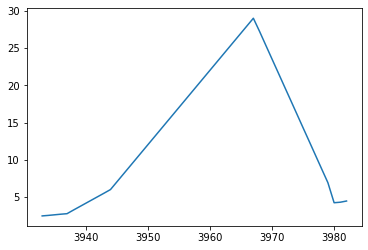

28号球每13期移动出击间隔均值线


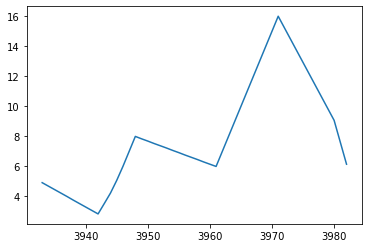

30号球每13期移动出击间隔均值线


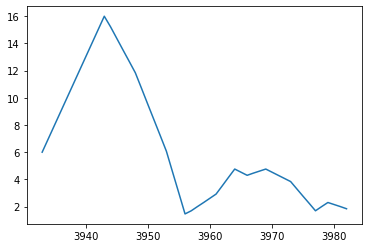

33号球每13期移动出击间隔均值线


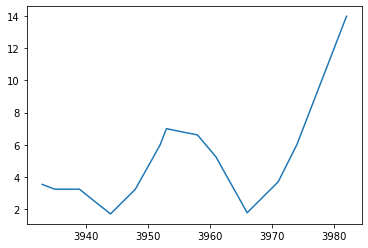

35号球每13期移动出击间隔均值线


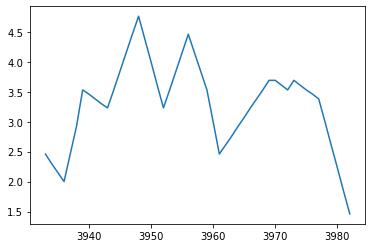

In [28]:
# 循环遍历c92a中各球画出每13期移动出击间隔均值线
for i in range(len(c92a)):
    # 计算x/y的数据
    y1 = df1b[df1b.球号==c92a[i]].间隔均值[qs:]
    x1 = df1b[df1b.球号==c92a[i]].期号[qs:]
    # 创建画布 p，设置 x_axis_type='datetime'
    # plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(c92a[i])+'号球每13期移动出击间隔均值线')
    plt.plot(x1.index, y1)
    plt.title=str(c92a[i])+'号球每13期移动出击间隔均值线'
    plt.show()
    

In [29]:
date1 = (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
date1

'2022-03-27 01:06:44'